In [1]:
import yfinance as yf
import pandas as pd

tickers = ['AAPL']

start_date = '1980-01-01'
end_date = '2024-01-01'

appl_data = []
for ticker in tickers:
    data = yf.download(ticker, start=start_date, end=end_date)
    data['Ticker'] = ticker
    appl_data.append(data)

new_appl_data= pd.concat(appl_data)
print(new_appl_data.head())
new_appl_data.to_csv('appl_stock_prices.csv')

print("Data has been saved to appl_stock_prices.csv")


[*********************100%%**********************]  1 of 1 completed


                Open      High       Low     Close  Adj Close     Volume  \
Date                                                                       
1980-12-12  0.128348  0.128906  0.128348  0.128348   0.099058  469033600   
1980-12-15  0.122210  0.122210  0.121652  0.121652   0.093890  175884800   
1980-12-16  0.113281  0.113281  0.112723  0.112723   0.086999  105728000   
1980-12-17  0.115513  0.116071  0.115513  0.115513   0.089152   86441600   
1980-12-18  0.118862  0.119420  0.118862  0.118862   0.091737   73449600   

           Ticker  
Date               
1980-12-12   AAPL  
1980-12-15   AAPL  
1980-12-16   AAPL  
1980-12-17   AAPL  
1980-12-18   AAPL  
Data has been saved to appl_stock_prices.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
appl_df = pd.read_csv('appl_stock_prices.csv')

In [4]:
print(appl_df.shape[0])

10853


In [5]:
appl_df.head()


,Date,Open,High,Low,Close,Adj Close,Volume,Ticker
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099058,469033600,AAPL
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093890,175884800,AAPL
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086999,105728000,AAPL
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089152,86441600,AAPL
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091737,73449600,AAPL


In [6]:
appl_df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
Ticker        object
dtype: object

In [7]:
appl_df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,10853.000000,10853.000000,10853.000000,10853.000000,10853.000000,1.085300e+04
mean,20.058032,20.277636,19.846894,20.071533,19.270156,3.214835e+08
std,41.940333,42.403593,41.508546,41.977971,41.473977,3.363666e+08
min,0.049665,0.049665,0.049107,0.049107,0.037900,0.000000e+00
25%,0.294643,0.301339,0.287946,0.294643,0.240749,1.160708e+08
50%,0.508929,0.517857,0.502232,0.511161,0.417151,2.090368e+08
75%,18.895714,19.043928,18.712856,18.924286,16.440126,4.014556e+08
max,198.020004,199.619995,197.000000,198.110001,197.589523,7.421641e+09


In [8]:
# Data Cleaning

In [9]:
appl_df['Date'] = pd.to_datetime(appl_df['Date'])

In [10]:
appl_df.set_index('Date', inplace=True)

In [11]:
# Removing the 'Ticker' column, it's of no use
appl_df.drop('Ticker', axis=1, inplace=True)


In [12]:
appl_df.drop('Adj Close', axis=1, inplace=True)
#It's generally best to avoid including 'Adj Close' as a feature if you're using 'Close' as the target variable to prevent redundancy and potential data leakage. 

In [13]:
dup_rows=appl_df.duplicated()
num_dup_rows=dup_rows.sum()

print("Number of duplicate rows:", num_dup_rows)

Number of duplicate rows: 0


In [14]:
# missing values
missing_values=appl_df.isnull().sum()
print("Number of missing values in each column:")
print(missing_values)


Number of missing values in each column:
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64


In [15]:
# since my dataset is not very large i'm not implementing PCA for this dataset.

In [16]:
num_cols=len(appl_df.columns)
num_dependent_variables=1
num_independent_variables = num_cols - num_dependent_variables

print("Number of independent variables:",num_independent_variables)
print("Number of dependent variables:",num_dependent_variables)
# i have taken closing price(close) as the dependent variable and all other variables are independent variables

Number of independent variables: 4
Number of dependent variables: 1


In [17]:

open_above_50 = appl_df[appl_df['Open'] > 50]
num_open_above_50 = open_above_50.shape[0]

print("Number of times the opening was above 50:", num_open_above_50)


Number of times the opening was above 50: 1219


In [18]:

close_above_100 = appl_df[appl_df['Close'] > 10]
num_close_above_100 = close_above_100.shape[0]

print("Number of times the opening was above 100:", num_close_above_100)


Number of times the opening was above 100: 3342


In [19]:
# i choose not to remove this outlisers..give reasons in report


In [20]:
# fiding the change in price from the previous day
appl_df['Price Change'] = appl_df['Close'] - appl_df['Close'].shift(1)
appl_df.head()


,Open,High,Low,Close,Volume,Price Change
Date,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,469033600,NaN
1980-12-15,0.122210,0.122210,0.121652,0.121652,175884800,-0.006696
1980-12-16,0.113281,0.113281,0.112723,0.112723,105728000,-0.008929
1980-12-17,0.115513,0.116071,0.115513,0.115513,86441600,0.002790
1980-12-18,0.118862,0.119420,0.118862,0.118862,73449600,0.003349


In [21]:
days_7=7
days_14=14

appl_df['Moving Average 7'] =appl_df['Close'].rolling(window=days_7).mean()
appl_df['Moving Average 14']=appl_df['Close'].rolling(window=days_14).mean()

appl_df.dropna(inplace=True)
print(appl_df.head())


                Open      High       Low     Close    Volume  Price Change  \
Date                                                                         
1981-01-02  0.154018  0.155134  0.154018  0.154018  21660800      0.001674   
1981-01-05  0.151228  0.151228  0.150670  0.150670  35728000     -0.003348   
1981-01-06  0.144531  0.144531  0.143973  0.143973  45158400     -0.006697   
1981-01-07  0.138393  0.138393  0.137835  0.137835  55686400     -0.006138   
1981-01-08  0.135603  0.135603  0.135045  0.135045  39827200     -0.002790   

            Moving Average 7  Moving Average 14  
Date                                             
1981-01-02          0.152184           0.137197  
1981-01-05          0.154018           0.138791  
1981-01-06          0.153858           0.140386  
1981-01-07          0.150909           0.142179  
1981-01-08          0.147242           0.143575  


In [22]:
# creating a preprocessed file which i an use i other implementations

appl_df.to_csv('Python_preprocessed_appl_stock_prices.csv', index=True)


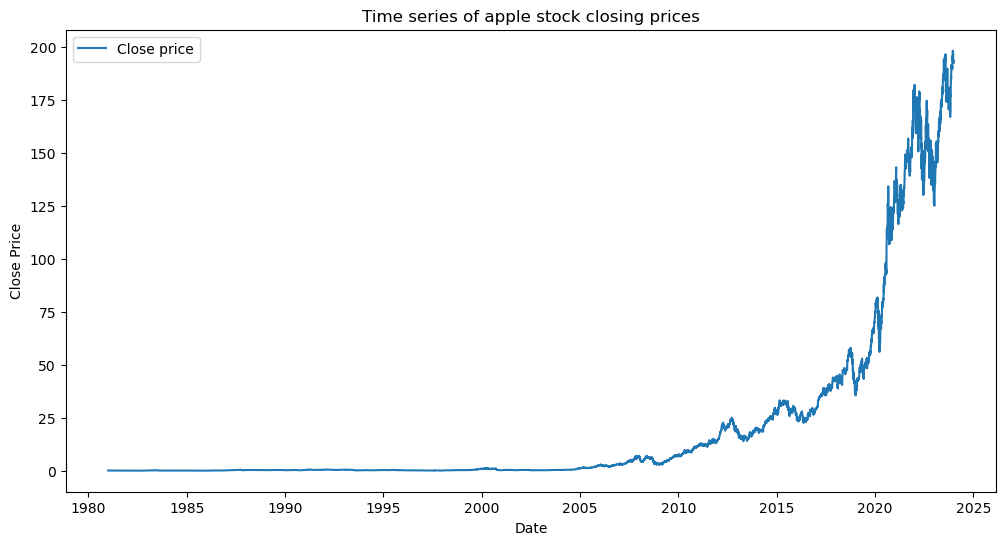

In [23]:
plt.figure(figsize=(12, 6))
plt.plot(appl_df['Close'], label='Close price')
plt.title('Time series of apple stock closing prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

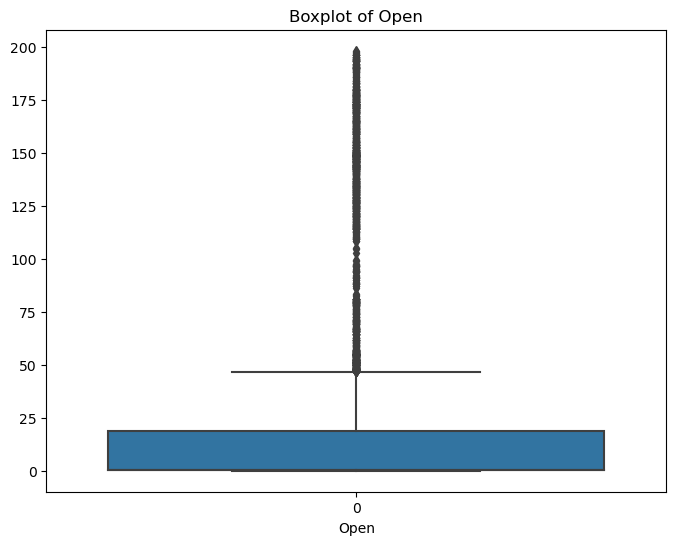

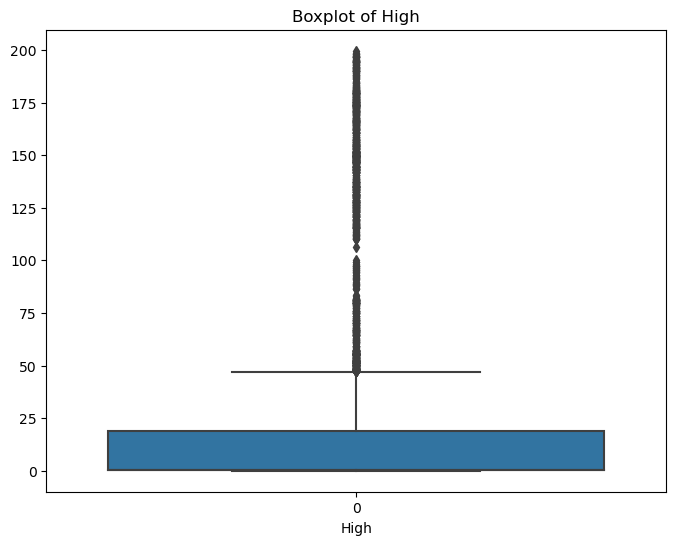

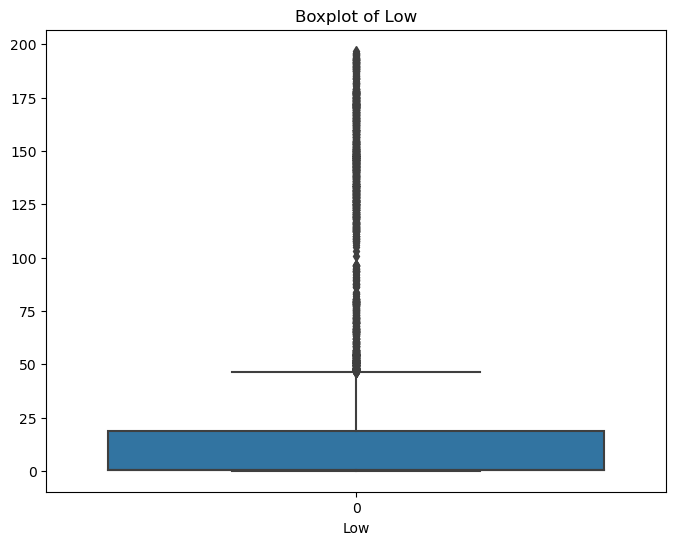

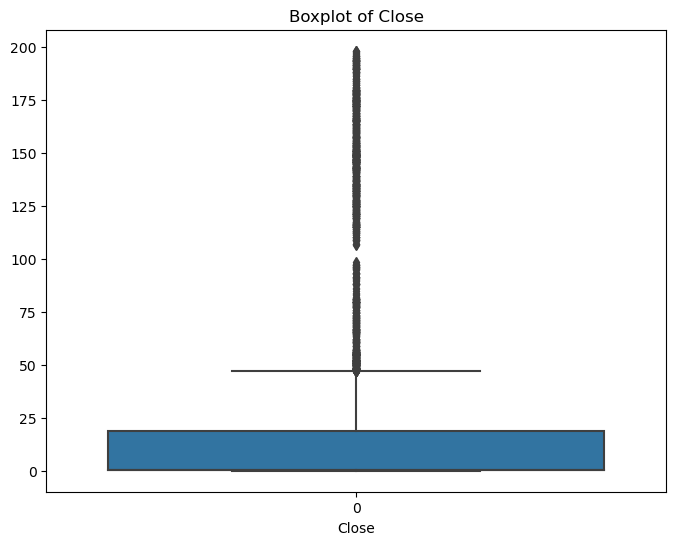

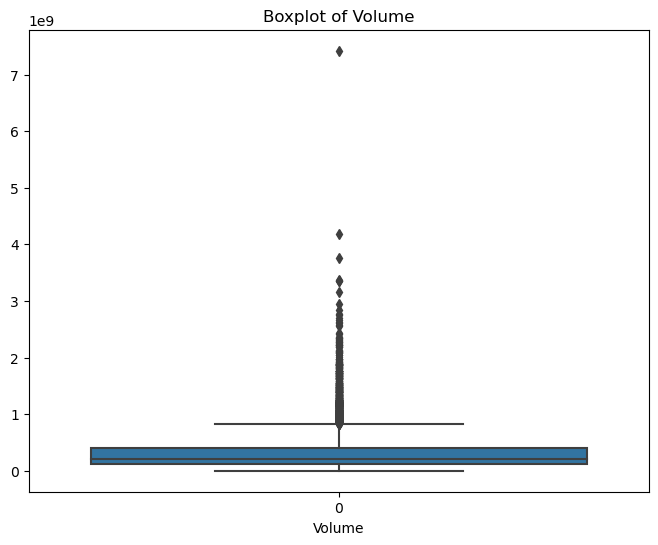

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
numeric_cols = ['Open','High','Low','Close','Volume']
for col in numeric_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=appl_df[col], orient='v')
    plt.title('Boxplot of ' + col)
    plt.xlabel(col)
    plt.show()


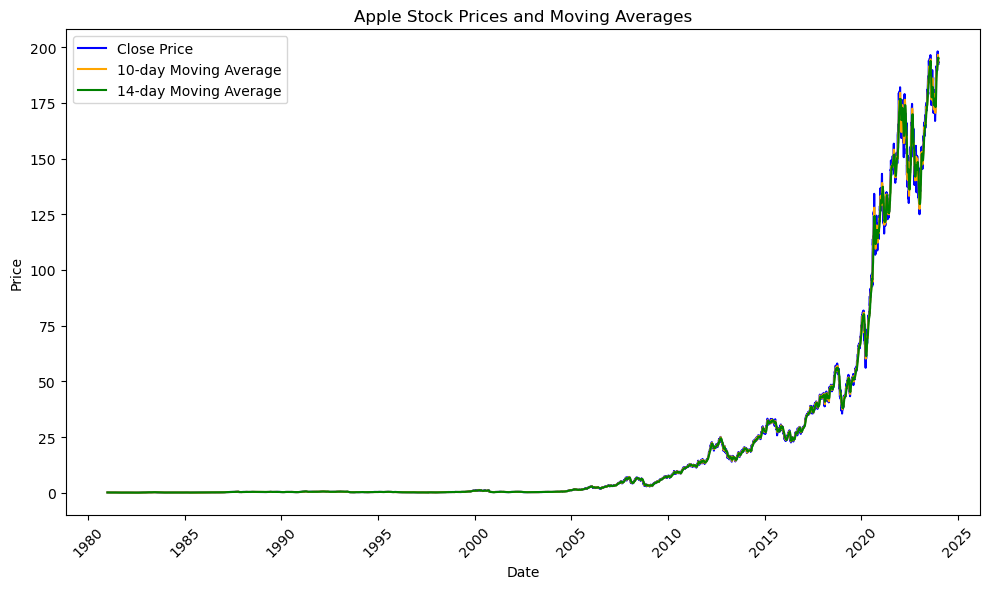

In [25]:
plt.figure(figsize=(10, 6))
plt.plot(appl_df.index, appl_df['Close'], label='Close Price', color='blue')
plt.plot(appl_df.index, appl_df['Moving Average 7'], label='10-day Moving Average', color='orange')
plt.plot(appl_df.index, appl_df['Moving Average 14'], label='14-day Moving Average', color='green')

plt.title('Apple Stock Prices and Moving Averages')
plt.ylabel('Price')
plt.legend()
plt.xlabel('Date')
plt.xticks(rotation=45)


plt.tight_layout()
plt.show()


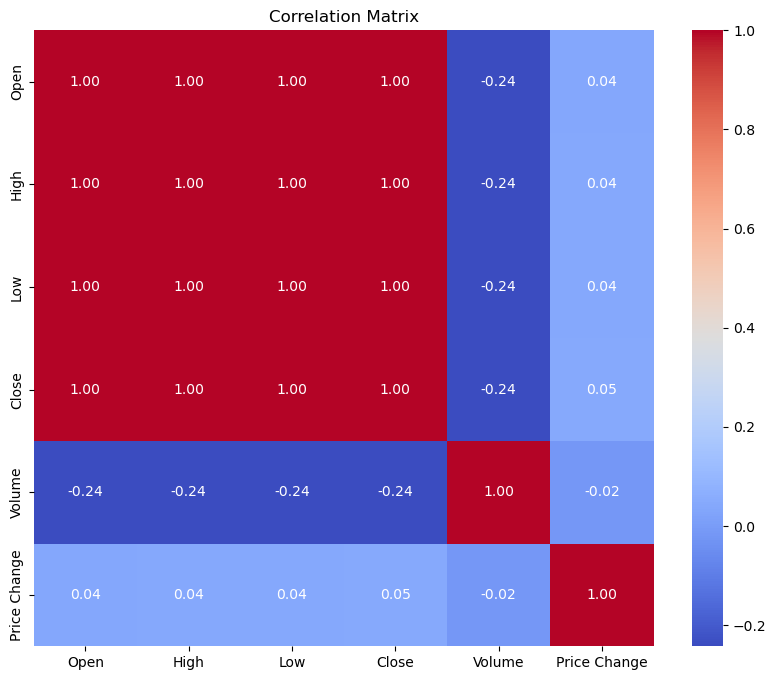

In [26]:
# corelation matrix heatmap

plt.figure(figsize=(10, 8))
sns.heatmap(appl_df[['Open', 'High', 'Low', 'Close', 'Volume','Price Change']].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

C:\Users\tenyj\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x600 with 0 Axes>

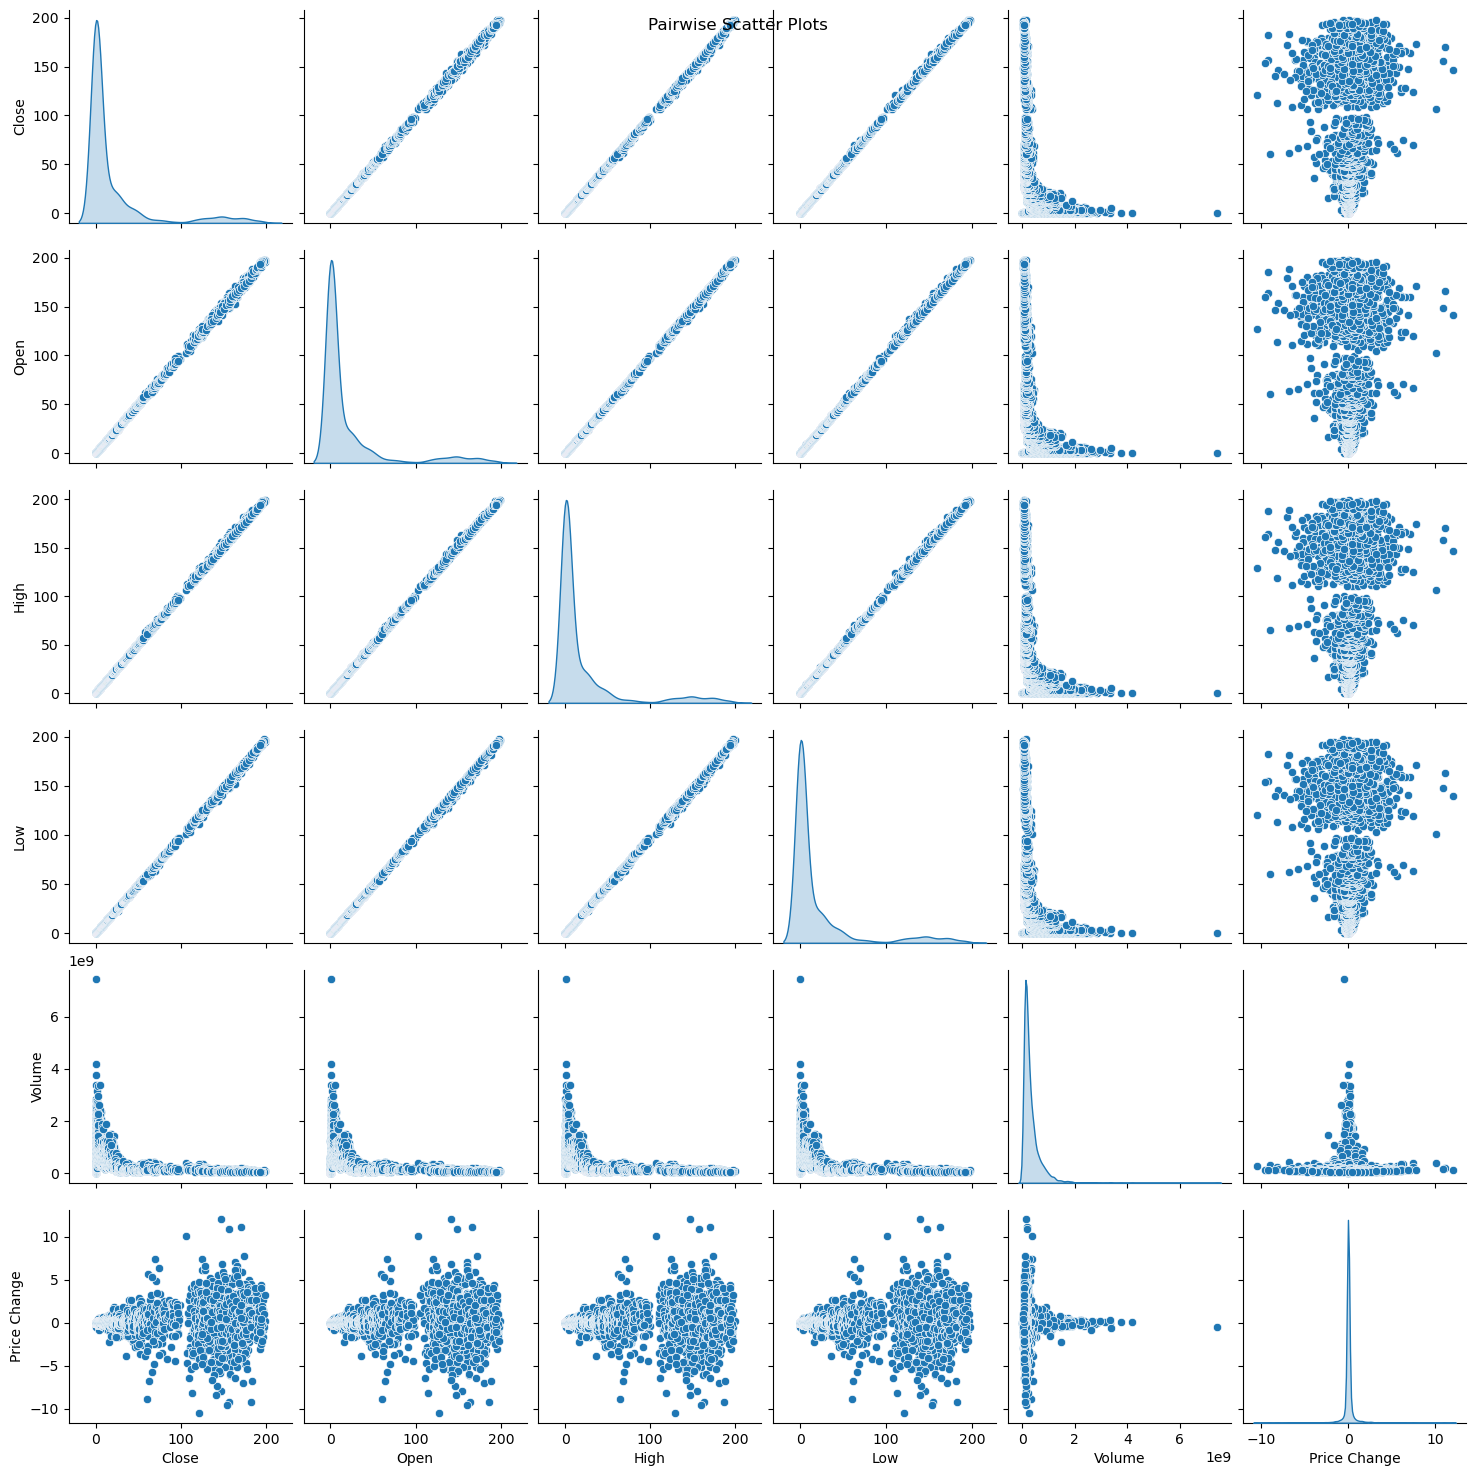

In [27]:
# Scatter Plot
plt.figure(figsize=(10, 6))
sns.pairplot(appl_df[['Close','Open','High','Low','Volume','Price Change']],diag_kind='kde')
plt.suptitle('Pairwise Scatter Plots')
plt.show()

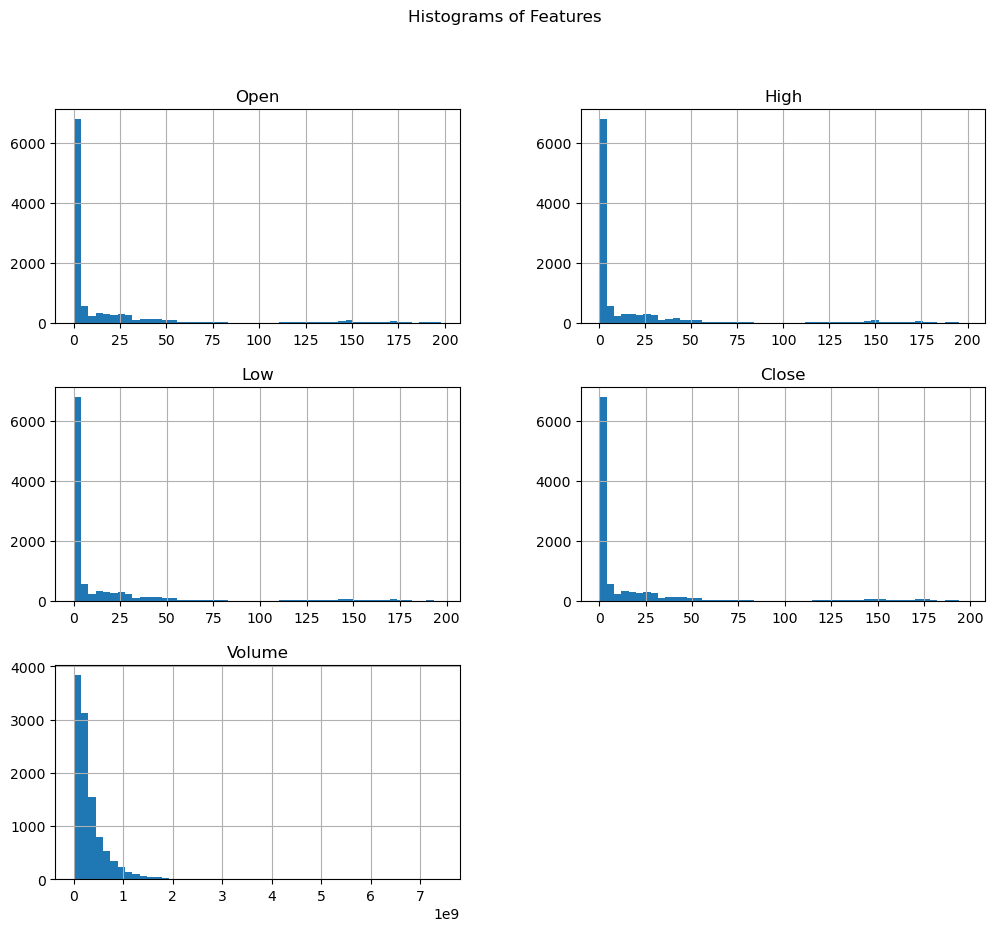

In [28]:
# Histograms
appl_df[['Open','High','Low','Close','Volume']].hist(bins=50,figsize=(12, 10))
plt.suptitle('Histograms of Features')
plt.show()

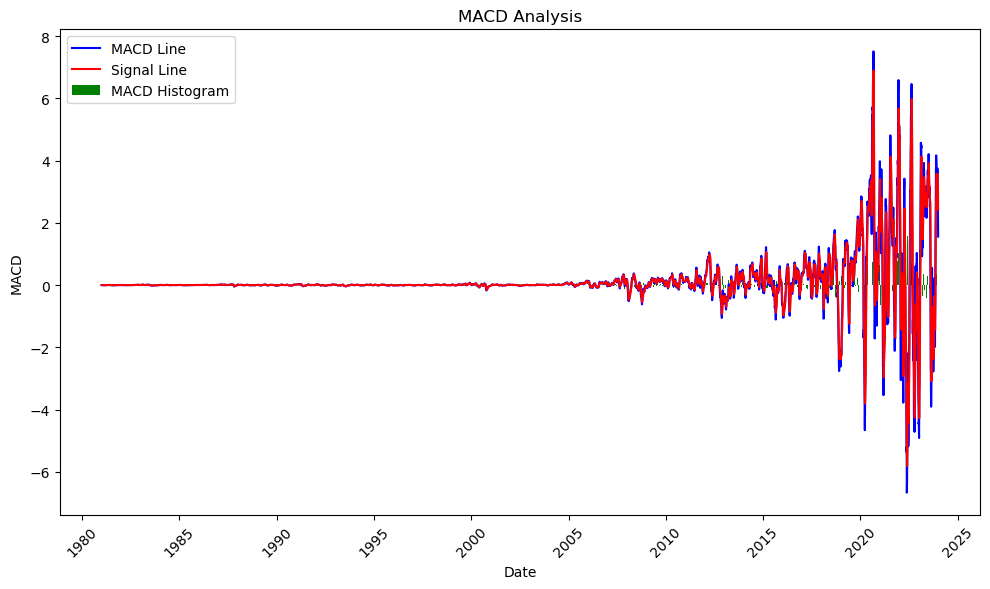

In [29]:

def calculate_macd(df):
    short_ema = df['Close'].ewm(span=12, min_periods=1).mean()
    long_ema = df['Close'].ewm(span=26, min_periods=1).mean()
    macd_line = short_ema - long_ema
    sig_line = macd_line.ewm(span=9, min_periods=1).mean()
    macd_hist= macd_line - sig_line
    return macd_line,sig_line, macd_hist

macd_line, sig_line, macd_hist= calculate_macd(appl_df)

plt.figure(figsize=(10, 6))
plt.plot(appl_df.index, macd_line, label='MACD Line', color='blue')
plt.plot(appl_df.index, sig_line, label='Signal Line', color='red')
plt.bar(appl_df.index, macd_hist, label='MACD Histogram', color='green')
plt.title('MACD Analysis')
plt.xlabel('Date')
plt.ylabel('MACD')
plt.legend()

# Show plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [30]:
# Preparing the data

In [31]:
from sklearn.model_selection import train_test_split

X = appl_df[['Open', 'High', 'Low', 'Volume', 'Moving Average 7', 'Moving Average 14']]
y = appl_df['Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [32]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train) 


RandomForestRegressor(random_state=42)

In [33]:
y_pred_rf = rf_model.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Mean Squared Error (MSE):{mse_rf}")
print(f"R² Score (R2):{r2_rf}")


Mean Squared Error (MSE):0.1449439660843219
R² Score (R2):0.9999175365917258


In [34]:
import numpy as np
from sklearn.metrics import mean_absolute_error
# RMSE
rmse_rf = np.sqrt(mse_rf)

# MAE
mae_rf = mean_absolute_error(y_test, y_pred_rf)
print(f"Root Mean Squared Error (RMSE): {rmse_rf}")
print(f"Mean Absolute Error (MAE): {mae_rf}")

Root Mean Squared Error (RMSE): 0.3807150720477479
Mean Absolute Error (MAE): 0.12690249718990304


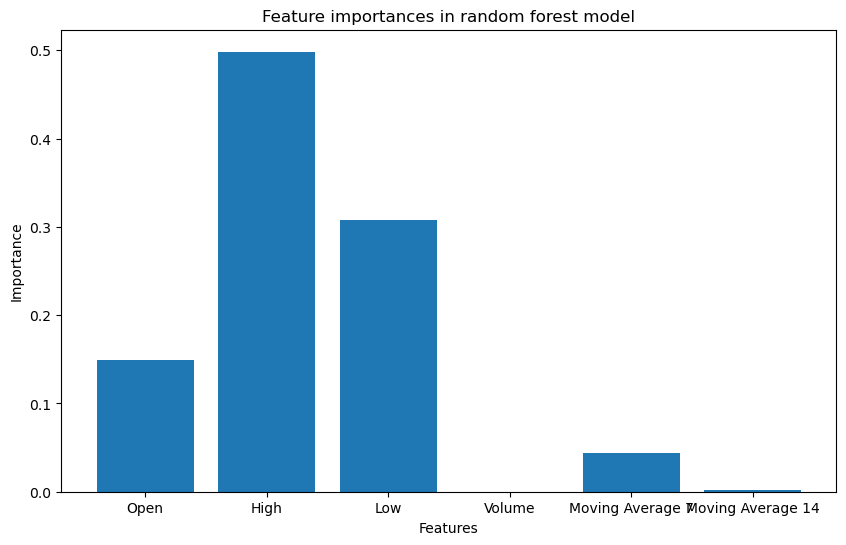

In [35]:
import matplotlib.pyplot as plt

feature_importances = rf_model.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
plt.bar(features, feature_importances)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature importances in random forest model')
plt.show()


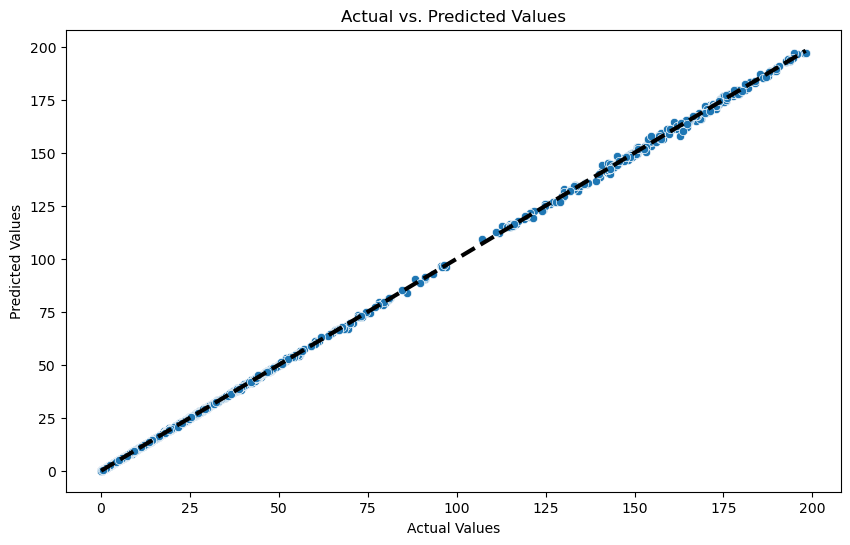

In [36]:
# actual vs predicted
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_rf)
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.show()


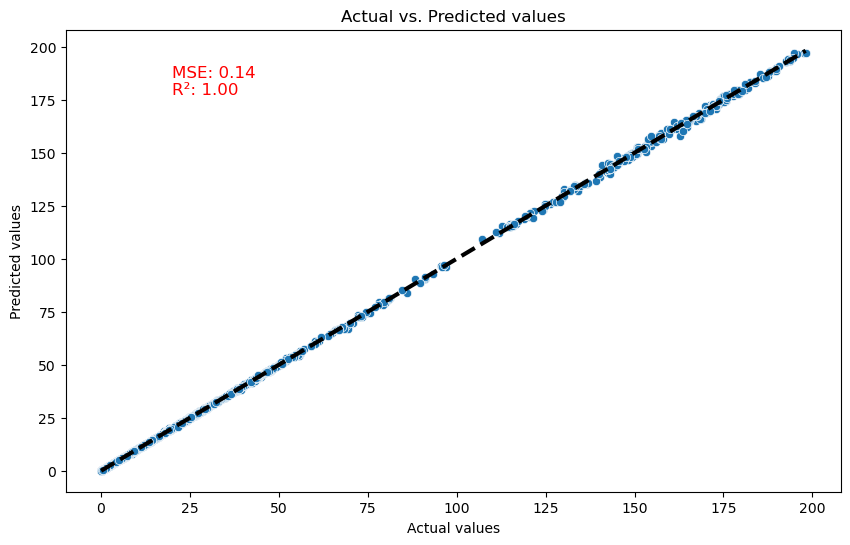

In [37]:

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_rf)
plt.title('Actual vs. Predicted values')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

plt.plot([y_test.min(),y_test.max()],[y_test.min(), y_test.max()],'k--', lw=3)

x_position = y_test.min() +(y_test.max() - y_test.min()) * 0.1  
y_position = y_pred_rf.max()-(y_pred_rf.max() - y_pred_rf.min()) * 0.1 
plt.text(x_position, y_position, f'MSE: {mse_rf:.2f}\nR²: {r2_rf:.2f}',fontsize=12, color='red')

plt.show()


In [39]:
# for training set
y_train_pred =rf_model.predict(X_train)

# for test set
y_test_pred=rf_model.predict(X_test)


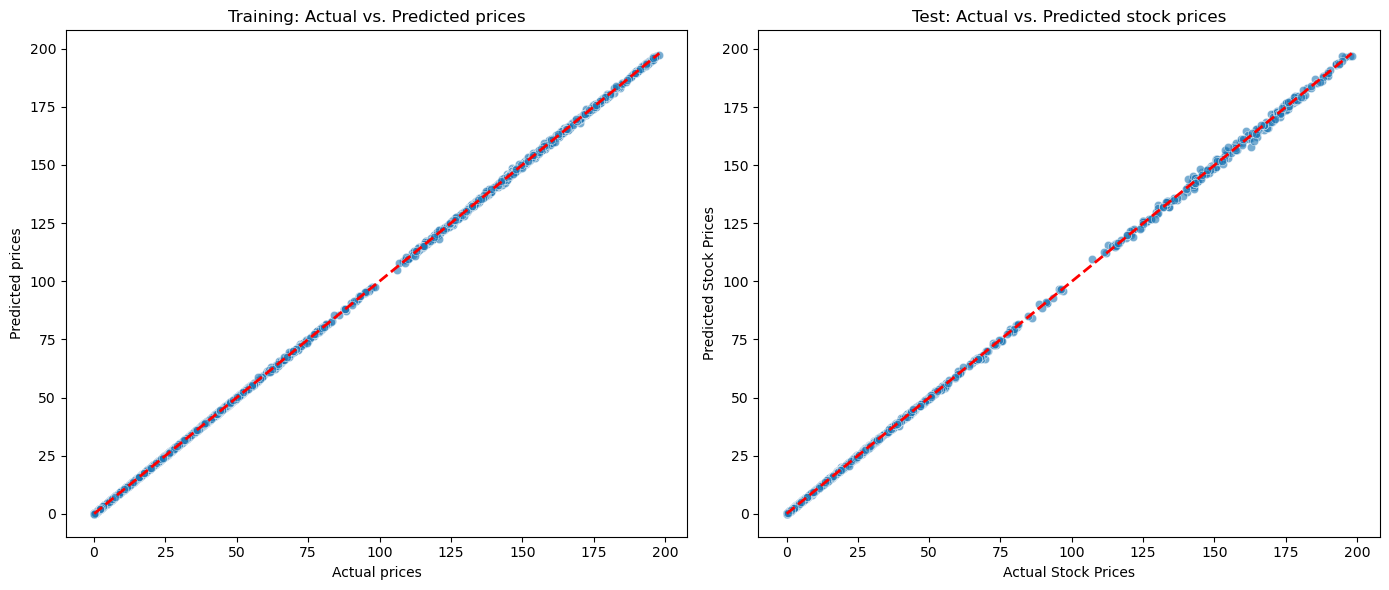

In [40]:
plt.figure(figsize=(14, 6))


plt.subplot(1, 2, 1) 
sns.scatterplot(x=y_train, y=y_train_pred, alpha=0.6)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], '--r', linewidth=2)
plt.title('Training: Actual vs. Predicted prices')
plt.xlabel('Actual prices')
plt.ylabel('Predicted prices')


plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=y_test_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.title('Test: Actual vs. Predicted stock prices')
plt.xlabel('Actual Stock Prices')
plt.ylabel('Predicted Stock Prices')

plt.tight_layout()
plt.show()
